In [14]:
from astropy.io import fits
from astropy.wcs import WCS
from regions import Regions
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Define file paths
mask_file = "../mask_pybdsf/8565_mask.fits"
region_file = "../mask_pybdsf/8565_artifacts.crtf"  # Your CRTF file
output_file = "../mask_pybdsf/8565_mask_modfied.fits"

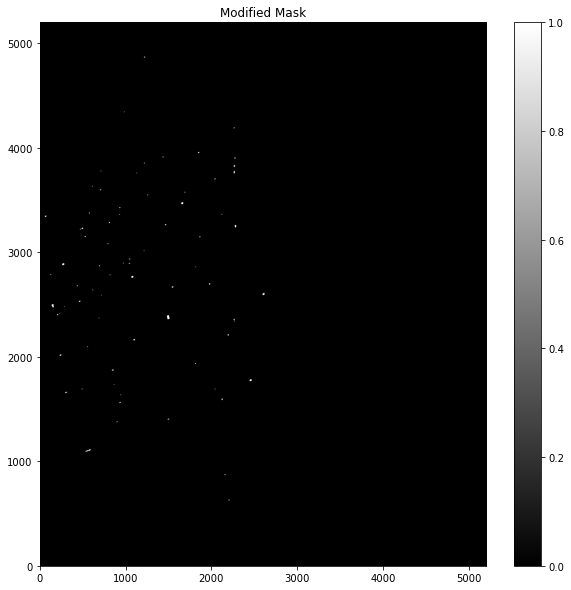

Modified mask saved as ../mask_pybdsf/8565_mask_modfied.fits


In [16]:
# Load the mask data
with fits.open(mask_file, mode='update') as hdul:
    mask_data = hdul[0].data  # Get the mask image array
    header = hdul[0].header   # Get the header for WCS information

    # Ensure the mask is 2D by selecting the first slice if it's 3D or 4D
    while mask_data.ndim > 2:
        mask_data = mask_data[0]

# Initialize WCS (only using first two axes: RA, Dec)
wcs = WCS(header, naxis=2)  # Force 2D WCS, ignoring spectral axis

# Load CRTF regions
regions = Regions.read(region_file, format="crtf")  # Read regions from CRTF

# Convert regions to pixel coordinates and remove artifacts
for region in regions:
    pixel_region = region.to_pixel(wcs)  # Convert to Pixel Region
    mask = pixel_region.to_mask()

    # Get bounding box coordinates
    ymin, ymax = int(mask.bbox.iymin), int(mask.bbox.iymax)
    xmin, xmax = int(mask.bbox.ixmin), int(mask.bbox.ixmax)

    # Apply mask to remove artifacts (set pixels to 0 inside the region)
    mask_data[ymin:ymax, xmin:xmax] = 0

# Save the modified mask
fits.writeto(output_file, mask_data, header, overwrite=True)


# Plot the modified mask
plt.figure(figsize=(10,10))
plt.imshow(mask_data, origin='lower', cmap='gray', aspect='auto')
plt.colorbar()
plt.title("Modified Mask")
plt.show()

print(f"Modified mask saved as {output_file}")